# STEP 03 볼린저 밴드

In [2]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql.cursors
import re

### 1. 개별 종목 일별 시세 가져오기

In [3]:
# 데이터베이스 연결
connection = pymysql.connect(host='localhost',   #데이터베이스 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )

In [4]:
cursor = connection.cursor()

In [5]:
#실행할 SQL
# 2019년 01월 01일 ~ 2020년 03월 19일 대상홀딩스의 종가 조회
sql = """
      select t1.STK_CD as 코드, t1.STK_NM as 종목, 
             t2.DT as 날짜, t2.C_PRC as 종가
      from stock as t1
           inner join history_dt as t2
                 on (t2.STK_CD = t1.STK_CD)
      where t1.STK_CD = '084690'
            and t2.DT >= str_to_date('20190101', '%Y%m%d')
            and t2.DT <= str_to_date('20200831', '%Y%m%d')
"""  

In [6]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

412

In [7]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [8]:
# SQL 쿼리 실행 결과 출력
result

[{'코드': '084690',
  '종목': '대상홀딩스',
  '날짜': datetime.date(2019, 1, 2),
  '종가': Decimal('7860.000')},
 {'코드': '084690',
  '종목': '대상홀딩스',
  '날짜': datetime.date(2019, 1, 3),
  '종가': Decimal('7810.000')},
 {'코드': '084690',
  '종목': '대상홀딩스',
  '날짜': datetime.date(2019, 1, 4),
  '종가': Decimal('8010.000')},
 {'코드': '084690',
  '종목': '대상홀딩스',
  '날짜': datetime.date(2019, 1, 7),
  '종가': Decimal('8150.000')},
 {'코드': '084690',
  '종목': '대상홀딩스',
  '날짜': datetime.date(2019, 1, 8),
  '종가': Decimal('8000.000')},
 {'코드': '084690',
  '종목': '대상홀딩스',
  '날짜': datetime.date(2019, 1, 9),
  '종가': Decimal('8290.000')},
 {'코드': '084690',
  '종목': '대상홀딩스',
  '날짜': datetime.date(2019, 1, 10),
  '종가': Decimal('8370.000')},
 {'코드': '084690',
  '종목': '대상홀딩스',
  '날짜': datetime.date(2019, 1, 11),
  '종가': Decimal('8380.000')},
 {'코드': '084690',
  '종목': '대상홀딩스',
  '날짜': datetime.date(2019, 1, 14),
  '종가': Decimal('8240.000')},
 {'코드': '084690',
  '종목': '대상홀딩스',
  '날짜': datetime.date(2019, 1, 15),
  '종가': Decimal('8400.000'

In [9]:
# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [10]:
df

,코드,종목,날짜,종가
0,084690,대상홀딩스,2019-01-02,7860.000
1,084690,대상홀딩스,2019-01-03,7810.000
2,084690,대상홀딩스,2019-01-04,8010.000
3,084690,대상홀딩스,2019-01-07,8150.000
4,084690,대상홀딩스,2019-01-08,8000.000
...,...,...,...,...
407,084690,대상홀딩스,2020-08-25,11800.000
408,084690,대상홀딩스,2020-08-26,12750.000
409,084690,대상홀딩스,2020-08-27,11800.000
410,084690,대상홀딩스,2020-08-28,11650.000


In [11]:
#조회한 컬럼 정보 조회
cursor.description

(('코드', 253, None, 40, 40, 0, False),
 ('종목', 253, None, 200, 200, 0, True),
 ('날짜', 10, None, 10, 10, 0, False),
 ('종가', 246, None, 20, 20, 3, True))

In [12]:
#조회한 컬럼의 정보를 desc에 저장
desc = cursor.description

In [13]:
desc

(('코드', 253, None, 40, 40, 0, False),
 ('종목', 253, None, 200, 200, 0, True),
 ('날짜', 10, None, 10, 10, 0, False),
 ('종가', 246, None, 20, 20, 3, True))

In [14]:
#리스트의 행 열 방향을 반대로 바꿈
list( zip(*desc) )

[('코드', '종목', '날짜', '종가'),
 (253, 253, 10, 246),
 (None, None, None, None),
 (40, 200, 10, 20),
 (40, 200, 10, 20),
 (0, 0, 0, 3),
 (False, True, False, True)]

In [15]:
#리스트의 0번째 열 리턴 => 조회한 컬럼 이름
list( zip(*desc) )[0]

('코드', '종목', '날짜', '종가')

In [16]:
#조회한 컬럼 이름을 column_name 에 대입
column_name = list( zip(*desc) )[0]

In [17]:
column_name

('코드', '종목', '날짜', '종가')

In [18]:
# for element in column_name : column_name에서 컬럼 이름 1개를 element에 대입
#element.upper() : 컬럼 이름 1개가 저장된 element를 대문자로 변환해서 리턴

[element.upper() for element in column_name]

['코드', '종목', '날짜', '종가']

In [19]:
# for element in column_name : column_name에서 컬럼 이름 1개를 element에 대입
#element.upper() : 컬럼 이름 1개가 저장된 element를 대문자로 변환해서 리턴
#대문자로 변환한 컬럼 이름을 column_name에 대입

column_name = [element.upper() for element in column_name]

In [20]:
column_name

['코드', '종목', '날짜', '종가']

In [21]:
#re.sub() : 특정 문자를 찾아서 삭제
#\S : 문자열
#\. : .
# .앞의 문자열 찾아서 삭제

# T3.FIN_ITM_VAL -> FIN_ITM_VAL 으로 변환

re.sub('\S*\.',"","T3.FIN_ITM_VAL" ) 

'FIN_ITM_VAL'

In [22]:
#re.sub() : 특정 문자를 찾아서 삭제
#\S : 문자열
#\. : .
# .앞의 문자열 찾아서 삭제

# 컬럼 이름에 . 앞의 문자열 삭제

column_name = [re.sub('\S*\.',"",element)  for element in column_name]

In [23]:
column_name

['코드', '종목', '날짜', '종가']

In [24]:
df.columns = column_name

In [25]:
df

,코드,종목,날짜,종가
0,084690,대상홀딩스,2019-01-02,7860.000
1,084690,대상홀딩스,2019-01-03,7810.000
2,084690,대상홀딩스,2019-01-04,8010.000
3,084690,대상홀딩스,2019-01-07,8150.000
4,084690,대상홀딩스,2019-01-08,8000.000
...,...,...,...,...
407,084690,대상홀딩스,2020-08-25,11800.000
408,084690,대상홀딩스,2020-08-26,12750.000
409,084690,대상홀딩스,2020-08-27,11800.000
410,084690,대상홀딩스,2020-08-28,11650.000


In [26]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   코드      412 non-null    object
 1   종목      412 non-null    object
 2   날짜      412 non-null    object
 3   종가      412 non-null    object
dtypes: object(4)
memory usage: 13.0+ KB


In [27]:
# DT 컬럼의 타입을 날짜와 시간으로 변환
df["날짜"] = pd.to_datetime (df["날짜"])

In [28]:
# C_PRC 컬럼의 타입을 정수로 변환
df.loc[: , "종가" ] = df.loc[: , "종가" ].astype("int64")

In [29]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   코드      412 non-null    object        
 1   종목      412 non-null    object        
 2   날짜      412 non-null    datetime64[ns]
 3   종가      412 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 13.0+ KB


### 2. 분산과 표준편차

In [30]:
# 종가의 기술 통계 값
df["종가"].describe()

count      412
unique     232
top       8200
freq         8
Name: 종가, dtype: int64

In [31]:
# 종가 분산
df["종가"].var()

1585978.6756194932

In [32]:
# 표준편차 == 분산에 루트 
# np.sqrt() : 루트 계산
# 분산에 루트를 계산하면 표준편차
np.sqrt(df["종가"].var())

1259.356452962978

In [33]:
# 분산에 0.5 승을 해도 표준편차
df["종가"].var() ** 0.5

1259.356452962978

In [34]:
# 종가의 표준편차
df["종가"].std()

1259.356452962978

In [35]:
df

,코드,종목,날짜,종가
0,084690,대상홀딩스,2019-01-02,7860
1,084690,대상홀딩스,2019-01-03,7810
2,084690,대상홀딩스,2019-01-04,8010
3,084690,대상홀딩스,2019-01-07,8150
4,084690,대상홀딩스,2019-01-08,8000
...,...,...,...,...
407,084690,대상홀딩스,2020-08-25,11800
408,084690,대상홀딩스,2020-08-26,12750
409,084690,대상홀딩스,2020-08-27,11800
410,084690,대상홀딩스,2020-08-28,11650


### 3. 20일간 종가 이동평균과 표준편차

In [36]:
# 20일간 종가의 이동평균

# rolling(20).mean() : 20일간의 이동 평균을 계산하는 함수
df["20일_이동평균"] = df["종가"].rolling(20).mean()

In [37]:
df.head(50)

,코드,종목,날짜,종가,20일_이동평균
0,084690,대상홀딩스,2019-01-02,7860,NaN
1,084690,대상홀딩스,2019-01-03,7810,NaN
2,084690,대상홀딩스,2019-01-04,8010,NaN
3,084690,대상홀딩스,2019-01-07,8150,NaN
4,084690,대상홀딩스,2019-01-08,8000,NaN
5,084690,대상홀딩스,2019-01-09,8290,NaN
6,084690,대상홀딩스,2019-01-10,8370,NaN
7,084690,대상홀딩스,2019-01-11,8380,NaN
8,084690,대상홀딩스,2019-01-14,8240,NaN
9,084690,대상홀딩스,2019-01-15,8400,NaN


In [38]:
# 20일간 주가의 표준편차
df["20일_표준편차"] = df["종가"].rolling(20).std()

In [39]:
df.head(50)

,코드,종목,날짜,종가,20일_이동평균,20일_표준편차
0,084690,대상홀딩스,2019-01-02,7860,NaN,NaN
1,084690,대상홀딩스,2019-01-03,7810,NaN,NaN
2,084690,대상홀딩스,2019-01-04,8010,NaN,NaN
3,084690,대상홀딩스,2019-01-07,8150,NaN,NaN
4,084690,대상홀딩스,2019-01-08,8000,NaN,NaN
5,084690,대상홀딩스,2019-01-09,8290,NaN,NaN
6,084690,대상홀딩스,2019-01-10,8370,NaN,NaN
7,084690,대상홀딩스,2019-01-11,8380,NaN,NaN
8,084690,대상홀딩스,2019-01-14,8240,NaN,NaN
9,084690,대상홀딩스,2019-01-15,8400,NaN,NaN


In [40]:
# 상위 밴드
# UpperB = 종가의 이동평균 + (표준편차 * 2)
df["상위_밴드"] = df["20일_이동평균"] + (df["20일_표준편차"] * 2)

In [41]:
# 하위 밴드
# LowerB = 종가의 이동평균 - (표준편차 * 2)
df["하위_밴드"] = df["20일_이동평균"] - (df["20일_표준편차"] * 2)

In [42]:
df.sort_values('종가')

,코드,종목,날짜,종가,20일_이동평균,20일_표준편차,상위_밴드,하위_밴드
301,084690,대상홀딩스,2020-03-23,3295,4866.75,866.612089,6599.974178,3133.525822
299,084690,대상홀딩스,2020-03-19,3380,5109.00,744.685734,6598.371468,3619.628532
300,084690,대상홀딩스,2020-03-20,3490,4989.50,803.862223,6597.224446,3381.775554
302,084690,대상홀딩스,2020-03-24,3575,4758.00,886.188468,6530.376935,2985.623065
303,084690,대상홀딩스,2020-03-25,3855,4657.25,867.456165,6392.162329,2922.337671
...,...,...,...,...,...,...,...,...
411,084690,대상홀딩스,2020-08-31,11550,10061.00,1324.974280,12710.948560,7411.051440
410,084690,대상홀딩스,2020-08-28,11650,9903.00,1326.479710,12555.959420,7250.040580
407,084690,대상홀딩스,2020-08-25,11800,9363.00,1001.031573,11365.063146,7360.936854
409,084690,대상홀딩스,2020-08-27,11800,9740.50,1300.005972,12340.511943,7140.488057


### 4. pyplot을 통한 블린저 밴드 시각화

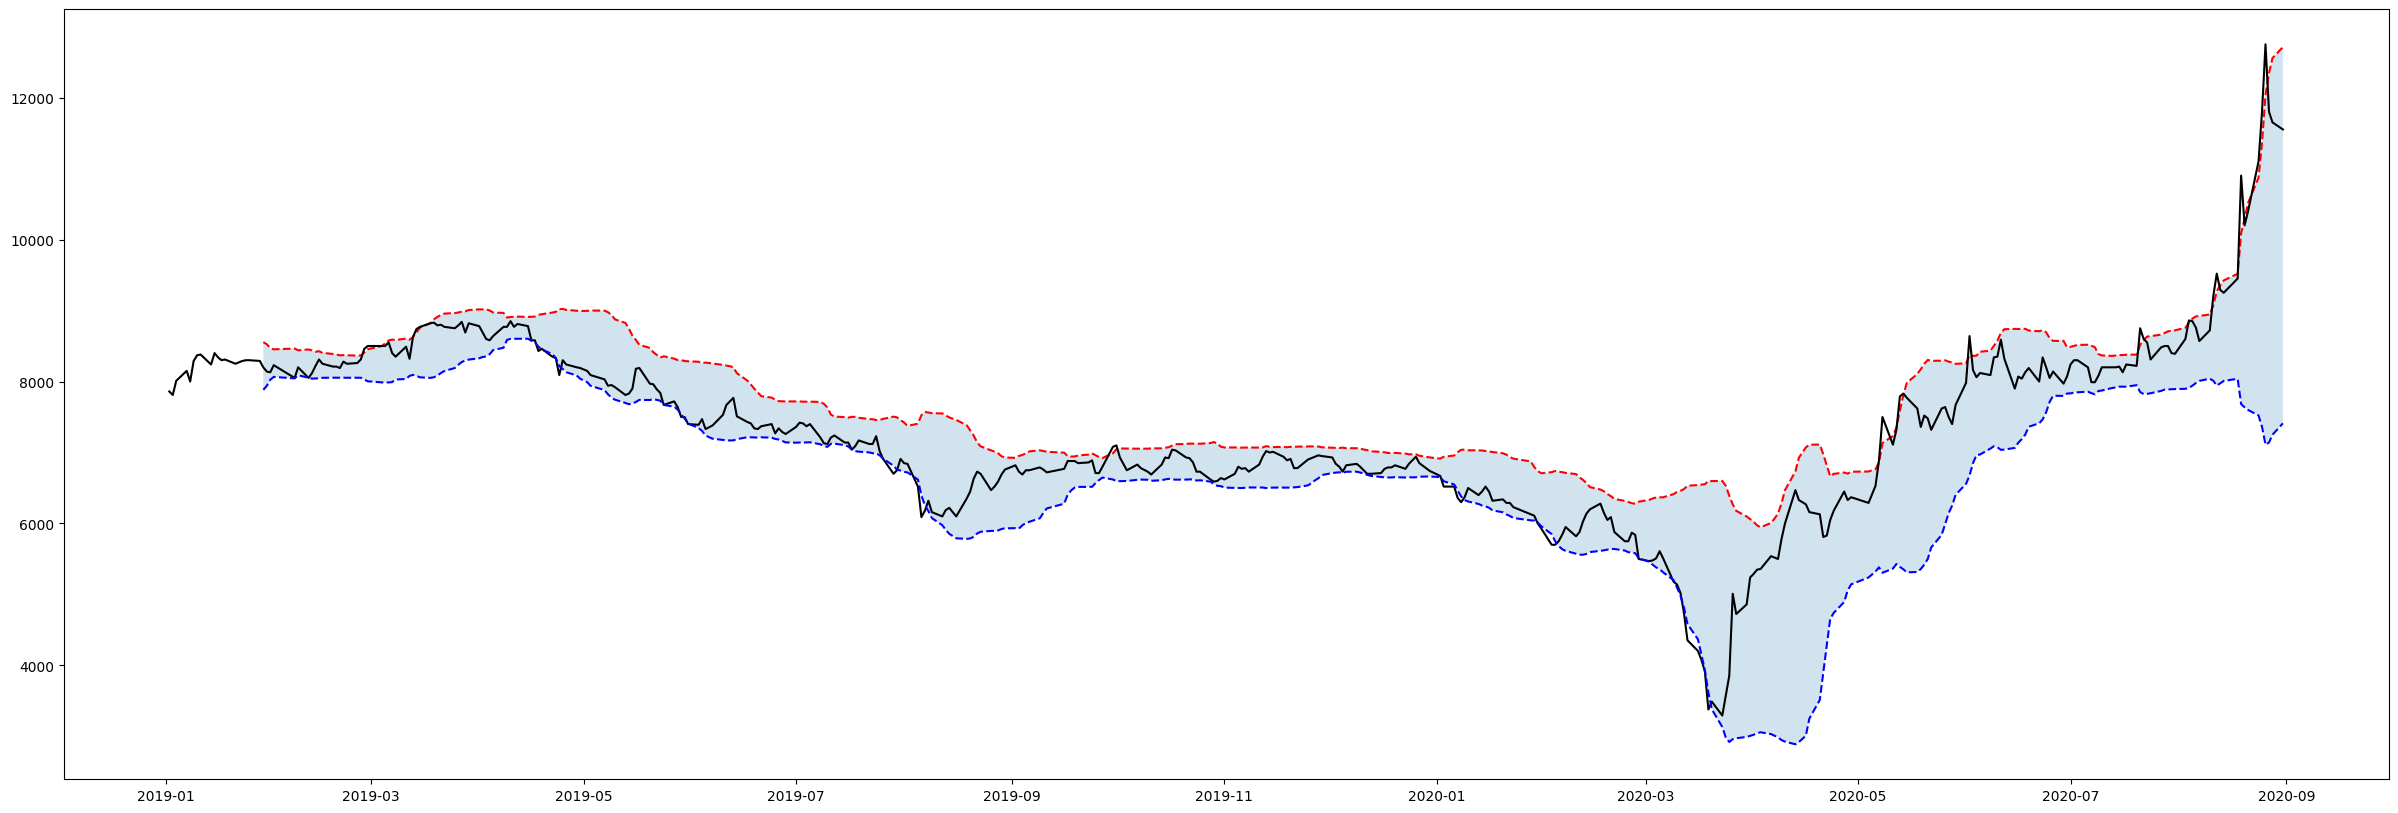

In [43]:
# pyplot을 통해 볼린저밴드를 시각화 합니다.

# 그래프의 크기 가로 30 세로 10
plt.figure(figsize=(30, 10))
# 상위 밴드 : 주식의 가격이 움직이는 밴드의 상위값 (빨강색으로 표시)
plt.plot(df.날짜, df.상위_밴드, "r--")
# 실제 주식의 가격 (종가) : 검정색
plt.plot(df.날짜, df.종가, "k")
# 하위밴드 : 주식이 움직이는 가격이 움직이는 밴드의 하위값 (하위값)
plt.plot(df.날짜, df.하위_밴드, "b--")

# 각 날짜의 df.LowerB(하위밴드) ~ df.UpperB (상위밴드) 사이를 색을 칠함
plt.fill_between(df.날짜, df.하위_밴드, df.상위_밴드, alpha=0.2)

### 5. %밴드

* %밴드를 통해 추세가 아닌 **주가의 상대적인 위치**를 파악할 수 있습니다.
* 0 보다 작거나 1보다 큰 구간은 밴드의 범위를 벗어난 구간으로 볼 수 있습니다.

In [44]:
# PercentB = (종가 - 하위밴드) / (상위밴드 - 하위밴드)
df["%_밴드"] = (df["종가"] - df["하위_밴드"]) / (df["상위_밴드"] - df["하위_밴드"])

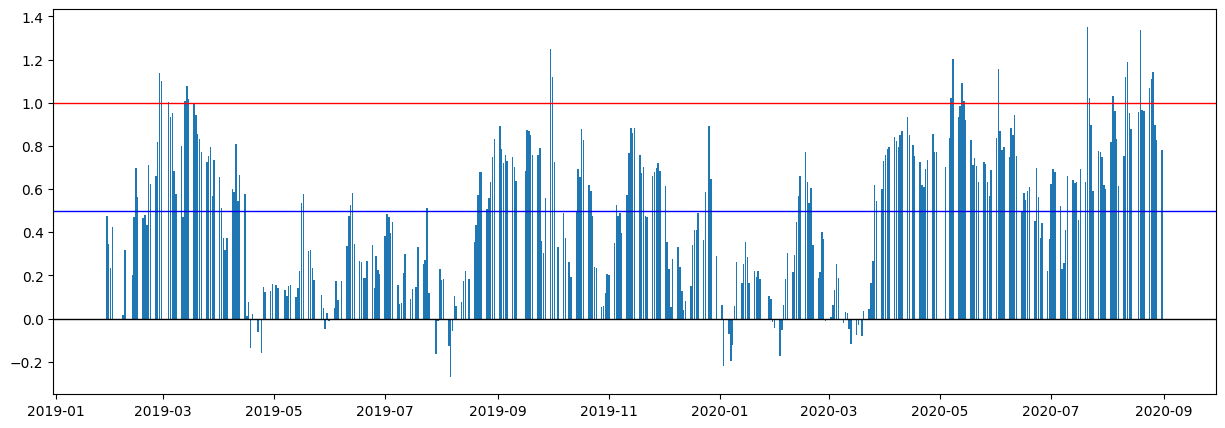

In [45]:
# 밴드 내에서 주가의 상대적인 위치를 시각화 합니다.
# 1보다 크면 밴드폭 상단을 돌파한 것이고
# 0보다 작으면 밴드폭 하단을 뚫고 내려간 것입니다.

# 그래프의 크기 가로 15 세로 5
plt.figure(figsize = (15, 5))
# 밴드내에서 주가의 상대 위치를 막대 그래프로 출력
plt.bar(df.날짜, df["%_밴드"])

# 1 지점에 선그림 (빨강색) -> 1보다 크면 밴드폭 상단을 돌파한 것이고
plt.axhline(1, c = "r", lw = 1)
# 0.5 지점에 선그림 (파랑색)
plt.axhline(0.5, c = "b", lw = 1)
# 0 지점에 선그림 (검정색) -> 0보다 작으면 밴드폭 하단을 뚫고 내려간 것입니다.
plt.axhline(0, c = "k", lw = 1)